In [1]:
import pyarrow.parquet as pq
import datetime
import pandas as pd
import numpy as np

In [2]:
df = pq.read_table(source='integratedData.parquet.gz').to_pandas()

In [3]:
df.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667
2,1999-01-01,0.0,38.2,0.00580,137.2,123.0,1.7,293.2,281.2,26.0,15.2,14.9,37.0,1.7,0.77,False,NaN,None,-117.891667,33.566667
3,1999-01-01,0.0,36.4,0.00567,137.3,49.0,1.8,293.3,280.3,27.0,15.0,14.8,38.0,1.8,0.76,False,NaN,None,-117.850000,33.566667
4,1999-01-01,0.0,33.8,0.00538,137.3,49.0,1.9,293.2,279.9,29.0,13.3,13.6,43.0,1.9,0.80,False,NaN,None,-117.808333,33.566667


In [5]:
fire_occured_df = df[df['fire_occurred']==True]

In [25]:
month_list = [0,0,0,0,0,0,0,0,0,0,0,0]
for item in fire_occured_df['date']:
    month_list[item.month-1] = month_list[item.month-1]+ 1;

In [26]:
print (month_list)

[11, 7, 0, 2, 166, 42, 195, 71, 27, 1197, 0, 25]


In [ ]:
#2.83% of Fire happened in the months of November-April. So we will ignore those months in the dataset. 

In [27]:
df_sorted = df.sort_values(['latitude', 'longitude','date'], ascending=[True,True,True])

In [28]:
df_sorted.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
1268,1999-01-01,0.0,49.5,0.00653,155.3,348.0,2.6,290.7,281.0,26.0,17.2,16.6,30.0,1.7,0.47,False,NaN,None,-117.141667,32.483333
2660,1999-01-02,0.0,54.3,0.00656,157.5,358.0,2.3,291.3,281.1,24.0,17.2,16.5,30.0,1.7,0.51,False,NaN,None,-117.141667,32.483333
4052,1999-01-03,0.0,41.1,0.00581,160.8,38.0,3.3,293.4,279.9,29.0,16.8,16.4,32.0,2.4,0.73,False,NaN,None,-117.141667,32.483333
5444,1999-01-04,0.0,23.9,0.00437,160.7,62.0,2.3,295.4,281.9,28.0,14.6,16.1,37.0,2.6,1.20,False,NaN,None,-117.141667,32.483333
6836,1999-01-05,0.0,24.1,0.00556,160.7,347.0,2.5,294.4,282.2,30.0,13.2,15.9,39.0,2.4,0.94,False,NaN,None,-117.141667,32.483333


In [31]:
df_sorted['month'] = df_sorted.apply(lambda row: row.date.month, axis = 1)
df_sorted['day']   = df_sorted.apply(lambda row: row.date.day, axis = 1)

In [37]:
df_sorted.shape

(6826300, 22)

In [47]:
df_upd = df_sorted[(df_sorted['month']>4) & (df_sorted['month']<11)]

In [48]:
df_upd.drop(['acres_burned','fire_name','date'],axis = 1,inplace=True)

In [49]:
df_upd.shape

(3438960, 19)

In [50]:
df_upd.columns

Index(['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'fire_occurred', 'longitude', 'latitude', 'month', 'day'],
      dtype='object')

In [76]:
pca_x = df_upd[df_upd.columns[~df_upd.columns.isin(['fire_occurred','month','day'])]].values
#pca_y = df_upd.loc[:,['fire_occurred']].values
#= df_upd.loc[:, df_upd.columns != []].values

Text(0, 0.5, 'cumulative explained variance')

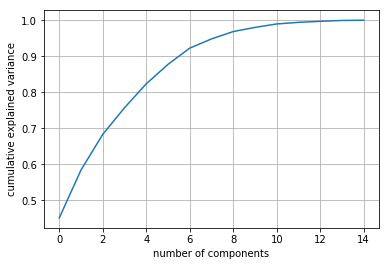

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca_std_x = StandardScaler().fit_transform(pca_x)
for ncomp in range(2,16):
    pca = PCA(n_components=ncomp)
    principalComponents = pca.fit_transform(pca_std_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')    

In [79]:
#Let's choose 8 components, which is 45% dimensionality reduction and still retaining ~98% of the variance in data
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(pca_std_x)
display(pca.explained_variance_ratio_)
columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8']
principalDf = pd.DataFrame(data = principalComponents, columns = columns)

array([0.45130498, 0.13310551, 0.09878946, 0.07377332, 0.06636549,
       0.05399408, 0.04510722, 0.02547147])

In [95]:
finalDf = pd.concat([principalDf, df_upd[['month','day','fire_occurred']].reset_index(drop=True)], axis = 1)

In [96]:
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,month,day,fire_occurred
0,3.179885,0.883956,-1.610307,-1.544757,0.232488,-0.248263,-0.241714,0.249867,5,1,False
1,3.376688,1.222850,-1.597321,-1.141798,0.474813,0.429110,-0.723446,0.180548,5,2,False
2,3.845278,1.818730,-0.298938,-0.748232,0.739113,-0.274251,-2.305019,-0.319927,5,3,False
3,3.880994,1.212676,-1.066964,-1.099840,0.688762,-0.507442,-1.637711,0.257133,5,4,False
4,3.498946,0.415506,-1.251885,-1.818474,-0.137174,-0.026516,0.178478,0.752971,5,5,False


In [99]:
finalDf[finalDf.isnull().any(axis=1)].shape

(0, 11)

In [100]:
finalDf[finalDf['fire_occurred']==True].shape

(1698, 11)

In [101]:
finalDf.shape

(3438960, 11)

In [104]:
finalDf.fire_occurred = finalDf.fire_occurred.astype(int)
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,month,day,fire_occurred
0,3.179885,0.883956,-1.610307,-1.544757,0.232488,-0.248263,-0.241714,0.249867,5,1,0
1,3.376688,1.222850,-1.597321,-1.141798,0.474813,0.429110,-0.723446,0.180548,5,2,0
2,3.845278,1.818730,-0.298938,-0.748232,0.739113,-0.274251,-2.305019,-0.319927,5,3,0
3,3.880994,1.212676,-1.066964,-1.099840,0.688762,-0.507442,-1.637711,0.257133,5,4,0
4,3.498946,0.415506,-1.251885,-1.818474,-0.137174,-0.026516,0.178478,0.752971,5,5,0


Every sequence will be 5 days long asking LSTM to predict a fire based on past 5 days of weather
	 Found Fire occurence 849
	 #. of sequences that have fire are  2286
	 Fires in the test data 572
Train on 469416 samples, validate on 52158 samples
Epoch 1/5
 - 131s - loss: 0.0033 - val_loss: 0.0033
Epoch 2/5
 - 129s - loss: 0.0033 - val_loss: 0.0033
Epoch 3/5
 - 138s - loss: 0.0033 - val_loss: 0.0033
Epoch 4/5
 - 150s - loss: 0.0033 - val_loss: 0.0033
Epoch 5/5
 - 120s - loss: 0.0033 - val_loss: 0.0033
RMSE: 0.057


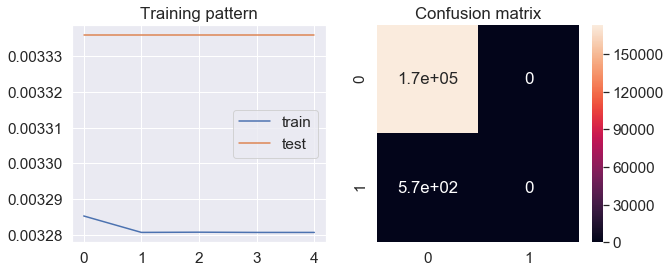

Every sequence will be 10 days long asking LSTM to predict a fire based on past 10 days of weather
	 Found Fire occurence 700
	 #. of sequences that have fire are  2088
	 Fires in the test data 549
Train on 241106 samples, validate on 26790 samples
Epoch 1/5
 - 106s - loss: 0.0057 - val_loss: 0.0062
Epoch 2/5
 - 109s - loss: 0.0057 - val_loss: 0.0062
Epoch 3/5
 - 150s - loss: 0.0057 - val_loss: 0.0062
Epoch 4/5
 - 157s - loss: 0.0057 - val_loss: 0.0062
Epoch 5/5
 - 164s - loss: 0.0057 - val_loss: 0.0062
RMSE: 0.078


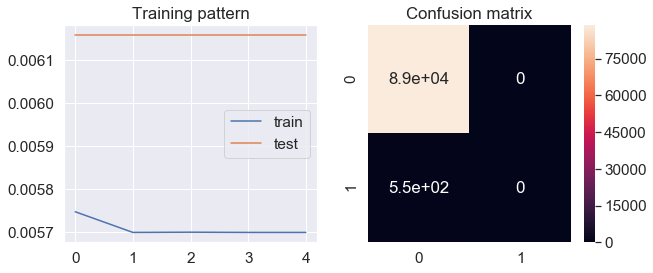

Every sequence will be 15 days long asking LSTM to predict a fire based on past 15 days of weather
	 Found Fire occurence 642
	 #. of sequences that have fire are  1922
	 Fires in the test data 505
Train on 167319 samples, validate on 18591 samples
Epoch 1/5
 - 143s - loss: 0.0077 - val_loss: 0.0070
Epoch 2/5
 - 161s - loss: 0.0077 - val_loss: 0.0070
Epoch 3/5
 - 162s - loss: 0.0077 - val_loss: 0.0070
Epoch 4/5
 - 161s - loss: 0.0077 - val_loss: 0.0070
Epoch 5/5
 - 167s - loss: 0.0077 - val_loss: 0.0070
RMSE: 0.090


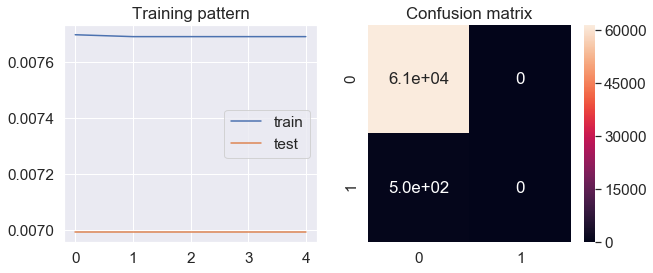

Every sequence will be 20 days long asking LSTM to predict a fire based on past 20 days of weather
	 Found Fire occurence 607
	 #. of sequences that have fire are  1891
	 Fires in the test data 473
Train on 132043 samples, validate on 14672 samples
Epoch 1/5
 - 228s - loss: 0.0098 - val_loss: 0.0102
Epoch 2/5
 - 238s - loss: 0.0096 - val_loss: 0.0102
Epoch 3/5
 - 242s - loss: 0.0096 - val_loss: 0.0102
Epoch 4/5
 - 226s - loss: 0.0096 - val_loss: 0.0102
Epoch 5/5
 - 218s - loss: 0.0096 - val_loss: 0.0102
RMSE: 0.098


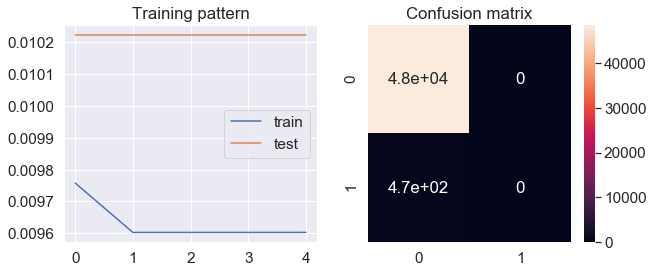

Every sequence will be 25 days long asking LSTM to predict a fire based on past 25 days of weather
	 Found Fire occurence 600
	 #. of sequences that have fire are  1863
	 Fires in the test data 492
Train on 112696 samples, validate on 12522 samples
Epoch 1/5
 - 281s - loss: 0.0117 - val_loss: 0.0117
Epoch 2/5
 - 323s - loss: 0.0109 - val_loss: 0.0117
Epoch 3/5
 - 325s - loss: 0.0109 - val_loss: 0.0117
Epoch 4/5
 - 302s - loss: 0.0109 - val_loss: 0.0117
Epoch 5/5
 - 289s - loss: 0.0109 - val_loss: 0.0117
RMSE: 0.109


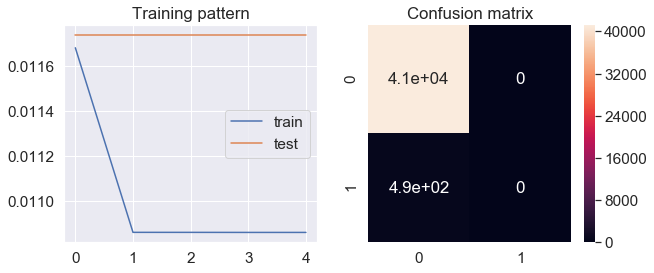

Every sequence will be 30 days long asking LSTM to predict a fire based on past 30 days of weather
	 Found Fire occurence 586
	 #. of sequences that have fire are  1815
	 Fires in the test data 485
Train on 100712 samples, validate on 11191 samples
Epoch 1/5
 - 379s - loss: 0.0123 - val_loss: 0.0130
Epoch 2/5
 - 403s - loss: 0.0118 - val_loss: 0.0130
Epoch 3/5
 - 384s - loss: 0.0118 - val_loss: 0.0130
Epoch 4/5
 - 380s - loss: 0.0118 - val_loss: 0.0130
Epoch 5/5
 - 406s - loss: 0.0118 - val_loss: 0.0130
RMSE: 0.114


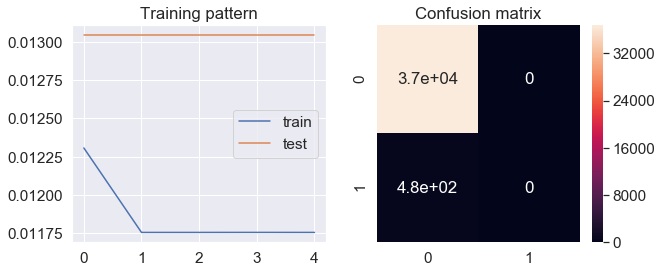

Every sequence will be 35 days long asking LSTM to predict a fire based on past 35 days of weather
	 Found Fire occurence 563
	 #. of sequences that have fire are  1779
	 Fires in the test data 434
Train on 92543 samples, validate on 10283 samples
Epoch 1/5
 - 538s - loss: 0.0136 - val_loss: 0.0120
Epoch 2/5
 - 525s - loss: 0.0132 - val_loss: 0.0120
Epoch 3/5
 - 503s - loss: 0.0132 - val_loss: 0.0120
Epoch 4/5
 - 436s - loss: 0.0132 - val_loss: 0.0120
Epoch 5/5
 - 459s - loss: 0.0132 - val_loss: 0.0120
RMSE: 0.113


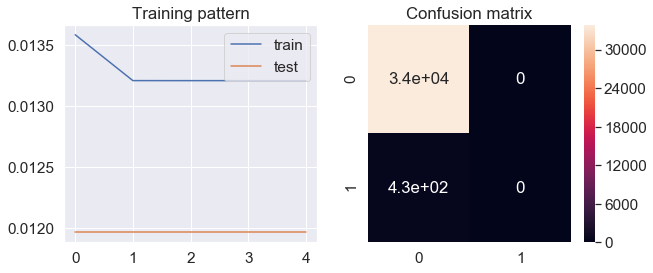

Every sequence will be 40 days long asking LSTM to predict a fire based on past 40 days of weather
	 Found Fire occurence 571
	 #. of sequences that have fire are  1851
	 Fires in the test data 461
Train on 88479 samples, validate on 9832 samples
Epoch 1/5
 - 555s - loss: 0.0142 - val_loss: 0.0138
Epoch 2/5
 - 627s - loss: 0.0142 - val_loss: 0.0138
Epoch 3/5
 - 591s - loss: 0.0142 - val_loss: 0.0138
Epoch 4/5
 - 661s - loss: 0.0142 - val_loss: 0.0138
Epoch 5/5
 - 595s - loss: 0.0142 - val_loss: 0.0138
RMSE: 0.119


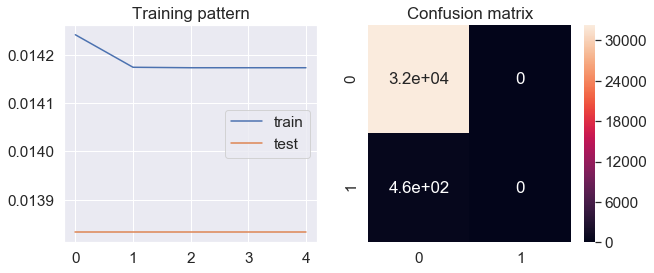

Every sequence will be 45 days long asking LSTM to predict a fire based on past 45 days of weather
	 Found Fire occurence 568
	 #. of sequences that have fire are  1805
	 Fires in the test data 454
Train on 85706 samples, validate on 9523 samples
Epoch 1/5
 - 637s - loss: 0.0144 - val_loss: 0.0127
Epoch 2/5
 - 600s - loss: 0.0144 - val_loss: 0.0127
Epoch 3/5
 - 598s - loss: 0.0144 - val_loss: 0.0127
Epoch 4/5
 - 807s - loss: 0.0144 - val_loss: 0.0127
Epoch 5/5
 - 874s - loss: 0.0144 - val_loss: 0.0127
RMSE: 0.120


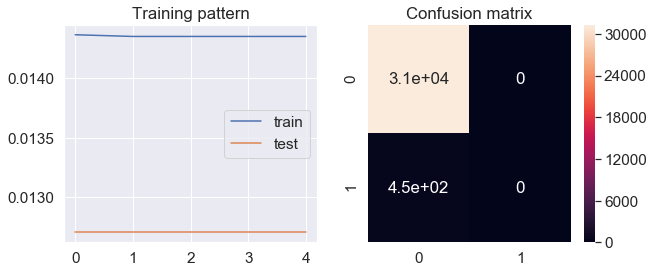

Every sequence will be 50 days long asking LSTM to predict a fire based on past 50 days of weather
	 Found Fire occurence 568
	 #. of sequences that have fire are  1825
	 Fires in the test data 455
Train on 84382 samples, validate on 9376 samples
Epoch 1/5
 - 852s - loss: 0.0153 - val_loss: 0.0142
Epoch 2/5
 - 751s - loss: 0.0147 - val_loss: 0.0142
Epoch 3/5
 - 863s - loss: 0.0147 - val_loss: 0.0142
Epoch 4/5
 - 869s - loss: 0.0147 - val_loss: 0.0142
Epoch 5/5
 - 933s - loss: 0.0147 - val_loss: 0.0142
RMSE: 0.121


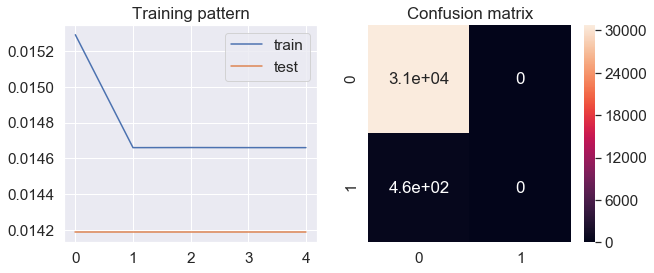

Every sequence will be 55 days long asking LSTM to predict a fire based on past 55 days of weather
	 Found Fire occurence 562
	 #. of sequences that have fire are  1808
	 Fires in the test data 448
Train on 83554 samples, validate on 9284 samples
Epoch 1/5
 - 1033s - loss: 0.0150 - val_loss: 0.0129
Epoch 2/5
 - 1021s - loss: 0.0148 - val_loss: 0.0129
Epoch 3/5
 - 1035s - loss: 0.0148 - val_loss: 0.0129
Epoch 4/5
 - 879s - loss: 0.0148 - val_loss: 0.0129
Epoch 5/5
 - 884s - loss: 0.0148 - val_loss: 0.0129
RMSE: 0.120


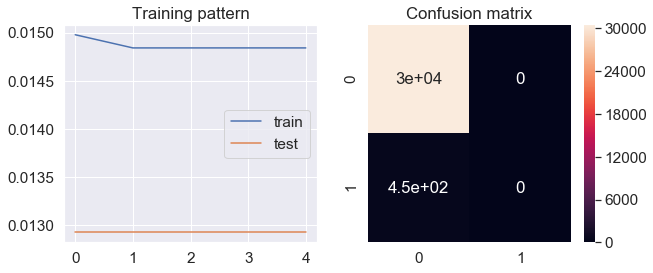

Every sequence will be 60 days long asking LSTM to predict a fire based on past 60 days of weather
	 Found Fire occurence 538
	 #. of sequences that have fire are  1762
	 Fires in the test data 434
Train on 81901 samples, validate on 9101 samples
Epoch 1/5
 - 1003s - loss: 0.0147 - val_loss: 0.0141
Epoch 2/5
 - 1080s - loss: 0.0147 - val_loss: 0.0141
Epoch 3/5
 - 1154s - loss: 0.0147 - val_loss: 0.0141
Epoch 4/5
 - 1122s - loss: 0.0147 - val_loss: 0.0141
Epoch 5/5
 - 1003s - loss: 0.0147 - val_loss: 0.0141
RMSE: 0.120


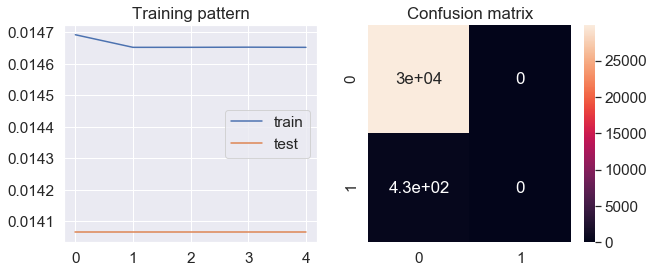

Every sequence will be 65 days long asking LSTM to predict a fire based on past 65 days of weather
	 Found Fire occurence 556
	 #. of sequences that have fire are  1782
	 Fires in the test data 427
Train on 84125 samples, validate on 9348 samples
Epoch 1/5
 - 1327s - loss: 0.0150 - val_loss: 0.0140
Epoch 2/5
 - 1219s - loss: 0.0145 - val_loss: 0.0140
Epoch 3/5
 - 1293s - loss: 0.0146 - val_loss: 0.0140
Epoch 4/5
 - 1259s - loss: 0.0145 - val_loss: 0.0140
Epoch 5/5
 - 1497s - loss: 0.0145 - val_loss: 0.0140
RMSE: 0.117


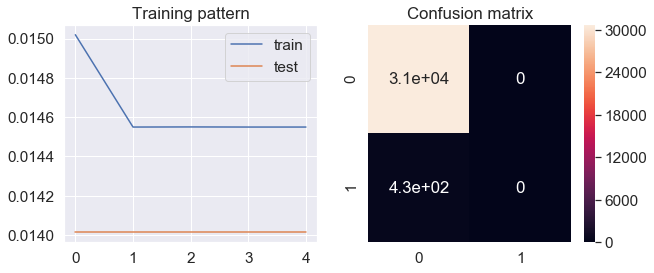

Every sequence will be 70 days long asking LSTM to predict a fire based on past 70 days of weather
	 Found Fire occurence 552
	 #. of sequences that have fire are  1757
	 Fires in the test data 430
Train on 84951 samples, validate on 9440 samples
Epoch 1/5
 - 1707s - loss: 0.0141 - val_loss: 0.0137
Epoch 2/5
 - 1612s - loss: 0.0141 - val_loss: 0.0137
Epoch 3/5
 - 1566s - loss: 0.0141 - val_loss: 0.0137
Epoch 4/5
 - 1705s - loss: 0.0141 - val_loss: 0.0137
Epoch 5/5
 - 1845s - loss: 0.0141 - val_loss: 0.0137
RMSE: 0.117


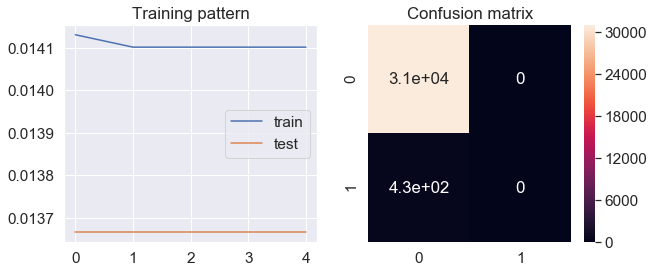

Every sequence will be 75 days long asking LSTM to predict a fire based on past 75 days of weather
	 Found Fire occurence 552
	 #. of sequences that have fire are  1784
	 Fires in the test data 433
Train on 86467 samples, validate on 9608 samples
Epoch 1/5
 - 2129s - loss: 0.0141 - val_loss: 0.0143
Epoch 2/5
 - 1704s - loss: 0.0140 - val_loss: 0.0143
Epoch 3/5
 - 1764s - loss: 0.0140 - val_loss: 0.0143
Epoch 4/5
 - 1765s - loss: 0.0140 - val_loss: 0.0143
Epoch 5/5
 - 1768s - loss: 0.0140 - val_loss: 0.0143
RMSE: 0.116


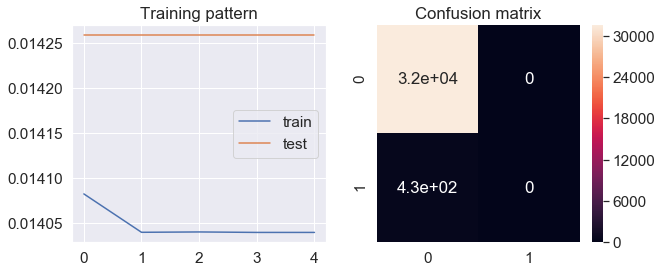

Every sequence will be 80 days long asking LSTM to predict a fire based on past 80 days of weather
	 Found Fire occurence 547
	 #. of sequences that have fire are  1788
	 Fires in the test data 457
Train on 87722 samples, validate on 9747 samples
Epoch 1/5
 - 2089s - loss: 0.0140 - val_loss: 0.0114
Epoch 2/5
 - 2091s - loss: 0.0139 - val_loss: 0.0114
Epoch 3/5
 - 2083s - loss: 0.0139 - val_loss: 0.0114
Epoch 4/5
 - 2096s - loss: 0.0139 - val_loss: 0.0114
Epoch 5/5
 - 2093s - loss: 0.0139 - val_loss: 0.0114
RMSE: 0.119


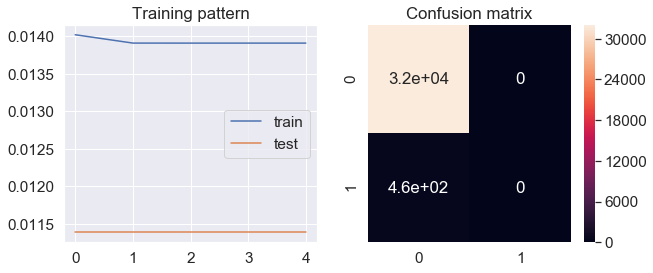

Every sequence will be 85 days long asking LSTM to predict a fire based on past 85 days of weather
	 Found Fire occurence 544
	 #. of sequences that have fire are  1761
	 Fires in the test data 401
Train on 89365 samples, validate on 9930 samples
Epoch 1/5
 - 2444s - loss: 0.0151 - val_loss: 0.0158
Epoch 2/5
 - 2451s - loss: 0.0135 - val_loss: 0.0158
Epoch 3/5
 - 2428s - loss: 0.0135 - val_loss: 0.0158
Epoch 4/5
 - 2414s - loss: 0.0135 - val_loss: 0.0158
Epoch 5/5
 - 2457s - loss: 0.0135 - val_loss: 0.0158
RMSE: 0.110


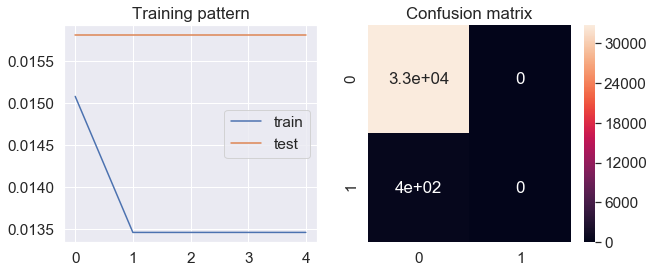

Every sequence will be 90 days long asking LSTM to predict a fire based on past 90 days of weather
	 Found Fire occurence 549
	 #. of sequences that have fire are  1774
	 Fires in the test data 447
Train on 92124 samples, validate on 10236 samples
Epoch 1/5
 - 3042s - loss: 0.0138 - val_loss: 0.0105
Epoch 2/5
 - 3498s - loss: 0.0132 - val_loss: 0.0105
Epoch 3/5
 - 3541s - loss: 0.0132 - val_loss: 0.0105
Epoch 4/5
 - 3514s - loss: 0.0132 - val_loss: 0.0105
Epoch 5/5
 - 2995s - loss: 0.0132 - val_loss: 0.0105
RMSE: 0.114


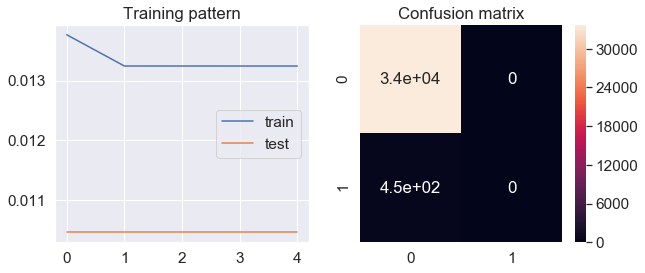

In [231]:
from sklearn.model_selection import train_test_split
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


lag_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
for lag in lag_list:            
    print ("Every sequence will be",lag, "days long asking LSTM to predict a fire based on past",lag,"days of weather")
    X = []
    y = []
    cnt=0
    for i in range(0,finalDf.shape[0],lag):
        if i+lag+1 in finalDf.index:
            if not finalDf.iloc[i:i+lag]['fire_occurred'].values.any(): #All Zeros. No fire occured
                X.append(finalDf.iloc[i:i+lag].values)
                y.append(finalDf.iloc[i+lag]['fire_occurred'])
            else:
                if i+2*lag in finalDf.index:
                    cnt=cnt+1;
                    for z in range(-lag,lag):  #If fire occured in this month resample it with 99% overlapping and create 30 sequences
                        X.append(finalDf.iloc[i+z:i+z+lag].values)
                        y.append(finalDf.iloc[i+z+lag+1]['fire_occurred'])
    print ("\t Found Fire occurence", cnt)
    print ("\t #. of sequences that have fire are ",y.count(1))
    #This would still heavily imbalanced even after resampling and dropping. Of ~150K sequences only 1861 have fire
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)
    print ("\t Fires in the test data", y_test.count(1))
    ##Build LSTM Model
    model = Sequential()
    model.add(LSTM(30, input_shape=(X_train[0].shape)))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'relu'))
    model.compile(loss='mae', optimizer='adam')           
    #Fit the model
    history = model.fit(np.array(X_train),np.array(y_train),epochs=5,validation_split = 0.1,verbose=2, shuffle=False)
    #Visualize Training
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Training pattern')
    plt.legend()
    # make a prediction
    y_pred = model.predict(np.array(X_test))
    #Measure metrics
    rms = sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE: %.3f' % rms)
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_test,y_pred)
    plt.title('Confusion matrix')
    df_cm = pd.DataFrame(cm, index = [0,1], columns = [0,1])
    sn.heatmap(df_cm, annot=True)
    plt.show()

In [232]:
model.summary()
print(model.layers[3].trainable_weights)

units = int(int(model.layers[0].trainable_weights[0].shape[1])/4)
print("No units: ", units)

W = model.layers[0].get_weights()[0]
U = model.layers[0].get_weights()[1]
b = model.layers[0].get_weights()[2]

W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

display(W_i)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 30)                5040      
_________________________________________________________________
dense_49 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_25 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 31        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________
[<tf.Variable 'dense_50/kernel:0' shape=(30, 1) dtype=float32, numpy=
array([[-0.35319704],
       [ 0.20871192],
       [ 0.43924195],
       [ 0.21123208],
       [-0.3688438 ],
       [ 0.36420262],
       [ 0.0260167 ],
       [ 0.3243132 ],
   

array([[ 2.09739447e-01,  1.07161820e-01,  1.43441811e-01,
         2.29129478e-01,  1.94331363e-01,  6.36880398e-02,
         1.31228611e-01, -1.15404623e-02,  1.92543447e-01,
         2.86772214e-02,  7.96651617e-02,  8.53672028e-02,
         1.01038627e-01,  1.58425078e-01, -1.72034018e-02,
        -1.01858757e-01,  3.31778564e-02,  1.59683719e-01,
         1.73557356e-01, -1.13549672e-01, -3.88644938e-03,
         4.09156419e-02, -2.18162954e-01, -8.73312876e-02,
         1.86845049e-01,  1.29383370e-01,  1.66422158e-01,
         5.42717911e-02, -2.11939886e-01,  1.76144689e-01],
       [ 1.91803053e-01, -1.35321021e-01,  9.16132610e-03,
         4.04560892e-03, -1.25363737e-01, -3.69555727e-02,
        -3.94181944e-02, -2.51909941e-02,  1.77669406e-01,
         7.16397166e-02, -1.26323700e-01, -2.07626741e-04,
         4.92442288e-02,  1.00005656e-01,  7.99406022e-02,
        -2.85326280e-02,  1.14075700e-02, -1.88571513e-01,
         1.95976168e-01,  1.76780671e-01, -3.72998118e-